In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

In [ ]:
## 1.Choose a classification dataset and normalize features.
## 2.Use KNeighborsClassifier from sklearn.
## 3.Experiment with different values of K.
## 4.Evaluate model using accuracy, confusion matrix.
## 5.Visualize decision boundaries.


In [4]:

# Load Iris dataset
df = pd.read_csv(r"C:\Users\prati\Downloads\archive (7)\Iris.csv")  # Adjust filename if needed

# Drop ID column and separate features and labels
X = df.drop(columns=["Id", "Species"])
y = df["Species"]

# Encode labels into integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)


In [7]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"K={k} -> Accuracy: {acc:.2f}")
    print("Confusion Matrix:\n", cm, "\n")


K=1 -> Accuracy: 0.93
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  3 12]] 

K=3 -> Accuracy: 0.91
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  4 11]] 

K=5 -> Accuracy: 0.91
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  4 11]] 

K=7 -> Accuracy: 0.93
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  3 12]] 

K=9 -> Accuracy: 0.96
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  2 13]] 



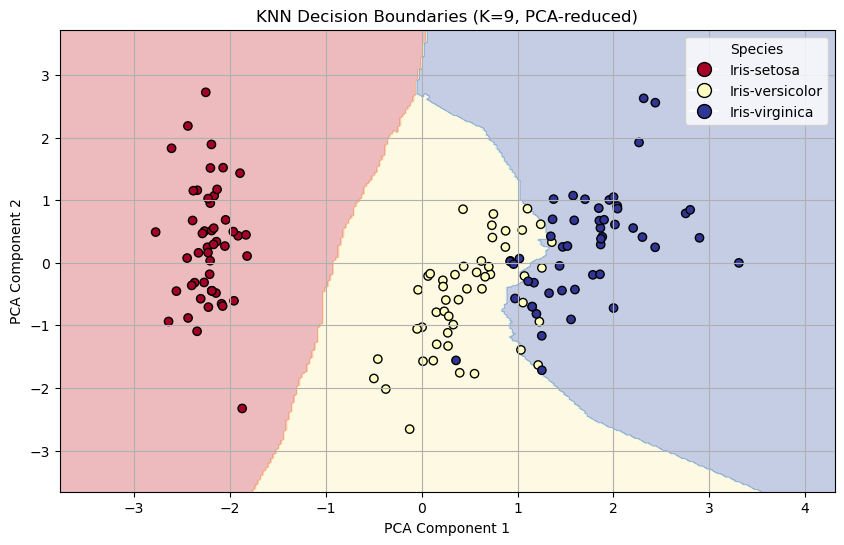

In [8]:
# Reduce features to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train KNN on PCA-reduced data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_pca, y_train_pca)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap=plt.cm.RdYlBu, edgecolor='k')

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=plt.cm.RdYlBu(i / 2), markersize=10, markeredgecolor='k')
    for i, label in enumerate(le.classes_)
]
plt.legend(handles=legend_elements, title="Species")

plt.title("KNN Decision Boundaries (K=9, PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()
